## 1: Basics of Galpy

In [4]:
# Import all necessary modules
import numpy  
import scipy
import matplotlib.pyplot as plt
import galpy
from galpy.potential import MWPotential2014
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.potential import plotRotcurve

a) Plot the rotation curve of MWPotential2014 out to 40 kpc and its components bulge, disk, and halo.

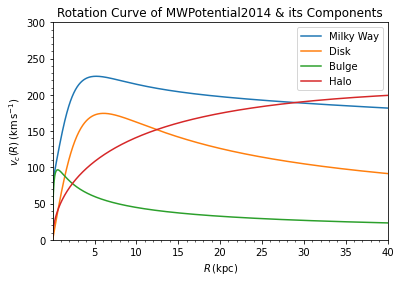

In [5]:
# Make potential instances for Milky Way Galaxy 
mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6) # disk
np= NFWPotential(a=4.5,normalize=.35) # halo
hp= HernquistPotential(a=0.6/8,normalize=0.05) # bulge
mp.turn_physical_on()
np.turn_physical_on()
hp.turn_physical_on()


mw = MWPotential2014
for item in mw:
    item.turn_physical_on()
plotRotcurve(mw, Rrange=[0.01,40.],grid=1001,yrange=[0.,300.], label = 'Milky Way')
mp.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Disk')
hp.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Bulge')
np.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Halo')
plt.legend()
plt.title('Rotation Curve of MWPotential2014 & its Components')
plt.savefig('Q1a.pdf')


b) Integrate the orbit of the Sun in MWPotential2014 for 10 Gyr


gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


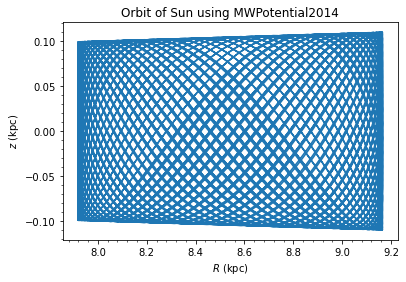

In [6]:
# integrate orbit of Sun for 10 Gyr
from galpy.orbit import Orbit
from astropy import units

sun_orbit = Orbit()
ts = numpy.linspace(0.,10., 10000)*units.Gyr
sun_orbit.integrate(ts,mw,method='odeint')
sun_orbit.plot()
plt.title('Orbit of Sun using MWPotential2014')
plt.savefig('Q1b.pdf')
plt.show()
plt.close()
#sun_orbit.animate()

c) Using the phase-space coordinates for GD-1 from Webb & Bovy (2019), integrate the orbit of GD-1 forward and backward in time for 50 Myr and plot the orbit in Dec. vs. RA and Distance vs. RA; this is approximately where the GD-1 stream lies on the sky

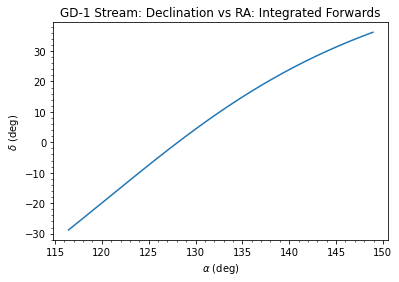

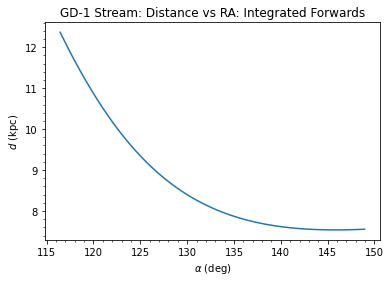

Current declination 36.15980426805255 deg
Current distance 7.555339165941959 kpc


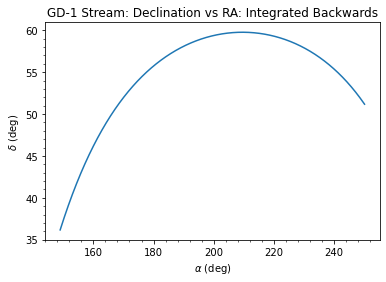

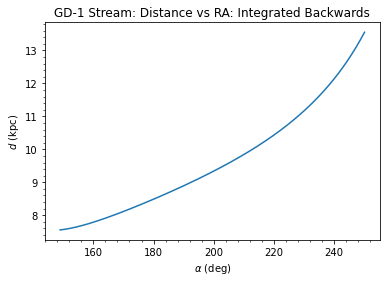

In [7]:
# integrate orbit of GD-1 forward and backwards in time
# Phase space coords: [ra,dec,d,mu_ra, mu_dec,vlos], pass as input to orbit object

ra = 148.9363998668805
dec = 36.15980426805254
d = 7.555339165941959 
mu_ra = -5.332929760383195
mu_dec = -12.198914465325117
vlos = 6.944006091929623 

GD_orbit =  Orbit(vxvv=[ra,dec,d,mu_ra, mu_dec,vlos], ro = 8, vo = 220, radec= True) #insert phase space coordinates of GD-1 here

# integrate forward in time
ts_f = numpy.linspace(0.,50., 10000)*units.Myr
GD_orbit.integrate(ts_f,mw)

GD_orbit.plot(d1 = 'ra', d2 = 'dec')
plt.title('GD-1 Stream: Declination vs RA: Integrated Forwards')
plt.savefig('Q1c_1.pdf')
GD_orbit.plot(d1 = 'ra', d2 = 'dist')
plt.title('GD-1 Stream: Distance vs RA: Integrated Forwards')
plt.savefig('Q1c_2.pdf')
plt.show()
plt.close()

# integrate backwards in time
ts_b = numpy.linspace(0.,-50., 10000)*units.Myr
GD_orbit.integrate(ts_b,mw)

GD_orbit.plot(d1 = 'ra', d2 = 'dec')
plt.title('GD-1 Stream: Declination vs RA: Integrated Backwards') 
plt.savefig('Q1c_3.pdf')
GD_orbit.plot(d1 = 'ra', d2 = 'dist')
plt.title('GD-1 Stream: Distance vs RA: Integrated Backwards')
plt.savefig('Q1c_4.pdf')

# 2 types of plots: Dec vs RA and Distance vs RA
# dist returns distance from observer obs = [X,Y,Z]

# Current positions of GD-1 stream
print('Current declination',GD_orbit.dec())
print('Current distance',GD_orbit.dist())

In [8]:
from galpy.util.config import __config__
__config__['astropy']['astropy-units']

'True'

## 2: Simulating Accretion of Globular Cluster onto MW

a) Integrate the orbits of all of the satellite galaxies of the Milky Way in MWPotential2014 and find their apo- and pericenters (integrate backwards in time). You can load the satellite galaxies with Orbit.from_name(‘MWsatellitegalaxies’). Plot their current spherical Galactocentric radius vs. both peri- and apocenter.

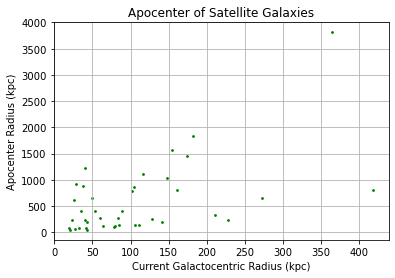

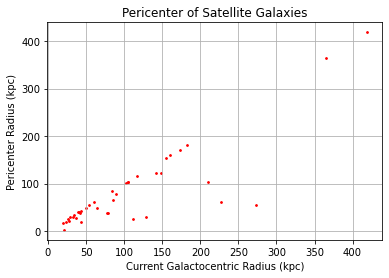

Satellite with smallest pericenter is: TucanaIII with index 35
The pericenter radius of TucanaIII is 2.266689968165295 kpc


In [9]:
satellite_g = Orbit.from_name('MWsatellitegalaxies')
ts = numpy.linspace(0., -5., 1000)*units.Gyr
# if you don't specify length then the velocity and distance scale values/
#(ro and vo) are used to calculate 1 distance length in internal units
satellite_g.integrate(ts, mw)

num = len(satellite_g)
peri = numpy.zeros(num)*units.kpc
apo = numpy.zeros(num)*units.kpc
current = numpy.zeros(num)*units.kpc # current spherical galactocentric radius 

for i, item in enumerate(satellite_g):
    peri[i] = item.rperi()
    apo[i] = item.rap()
    current[i] = item.r() # galactocentric radius 
    

# Plot current galactocentric radius vs both peri and apocenters \
#of all 40 satellites
# Apocenters:
plt.scatter(current, apo, s = 3.0, color = 'green')
plt.title('Apocenter of Satellite Galaxies')
plt.xlabel('Current Galactocentric Radius (kpc)')
plt.ylabel('Apocenter Radius (kpc)')
#plt.legend()
plt.grid()
plt.savefig('Q2a_1.pdf')
plt.show()
plt.close()
# Pericenters:
plt.scatter(current, peri, s = 3.0, color = 'red')
plt.title('Pericenter of Satellite Galaxies')
plt.xlabel('Current Galactocentric Radius (kpc)')
plt.ylabel('Pericenter Radius (kpc)')
#plt.legend()
plt.savefig('Q2a_2.pdf')
plt.grid()
plt.show()
plt.close()

#satellite_g.rperi() will return an array of pericenter radii for all satellite galaxies in the list satellite_g


# Find index of satellite with smallest pericenter:
smallest = 0
for i in range(len(satellite_g)):
    if satellite_g[i].rperi() < satellite_g[smallest].rperi():
        smallest = i
print('Satellite with smallest pericenter is: ' + satellite_g.name[smallest] + ' with index '+ str(smallest))
print('The pericenter radius of ' + satellite_g.name[smallest] + ' is ' + str(satellite_g[smallest].rperi()))
        

In [10]:
# Using the built-in enumerate() method in python 
lst = ['a','b','c','d','e']
for i, item in enumerate(lst, 0):
   # print(item)
    print('Item in list at index ' + str(i) + ' is ' + item)
    print('{%s}: {%s}'% (i, item)) # string formatting 

Item in list at index 0 is a
{0}: {a}
Item in list at index 1 is b
{1}: {b}
Item in list at index 2 is c
{2}: {c}
Item in list at index 3 is d
{3}: {d}
Item in list at index 4 is e
{4}: {e}


b) For the satellite with the smallest pericenter, find the time at which it reaches the smallest radius.

The time at which satellite galaxy TucanaIII reaches its smallest radius is: -1.7717717717717718 Gyr


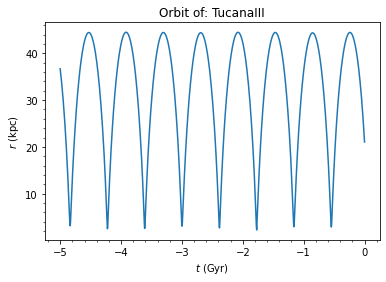

In [11]:
# Satellite galaxy with smallest pericenter is: TucanaIII with index 35 
# Time at which satellite reaches its smallest radius is at perihelion 

satellite_g[smallest].plot(d1 = 't', d2 = 'r')
plt.title('Orbit of: '+ satellite_g.name[smallest])
name_smallest = satellite_g.name[smallest] 

time = satellite_g[smallest].time()
# Find index of time array at which satellite 1st reaches its smallest radius (perihelion)
smallest_r = 0
for i in range(len(ts)):
    if satellite_g[smallest].r(ts[i]) < satellite_g[smallest].r(ts[smallest_r]):
        smallest_r = i
        
print('The time at which satellite galaxy ' + name_smallest + ' reaches its smallest radius is: '  + str(time[smallest_r]))


c) Give the satellite a mass (e.g., 10^11 Msun) and size following a=1.05 (Msat/10^8/Msun)^0.5 kpc and integrate backwards in time for t=10 Gyr, including the effect of dynamical friction. Plot the orbit of the satellite as radius vs. time. The satellite should be at progressively larger radii at earlier and earlier times.

[<Quantity -5.28353451 km / s>, <Quantity 21.3779472 km / s>, <Quantity -0.62189113 km / s>]
[<Quantity -18.9479866 kpc>, <Quantity -148.68516015 kpc>, <Quantity -188.20173667 kpc>]


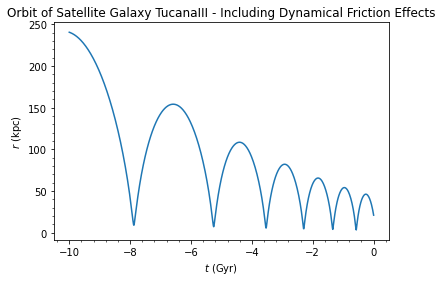

In [12]:
from galpy.potential import ChandrasekharDynamicalFrictionForce

Tuc_satellite = satellite_g[smallest](ro = 8., vo = 220.) #make copy of orbit instance 
Tuc_satellite.turn_physical_on(ro = 8., vo = 220.)
Msat = 10.**11.*units.Msun
size = 1.05*(Msat/(10.**8./1*units.Msun))**0.5*units.kpc
cdf= ChandrasekharDynamicalFrictionForce(GMs=Msat, rhm = size ,dens=MWPotential2014)
ts = numpy.linspace(0.,-10.,1000)*units.Gyr
Tuc_satellite.integrate(ts, mw+cdf)
Tuc_satellite.plot(d1 = 't', d2 = 'r')
plt.title('Orbit of Satellite Galaxy '+ name_smallest + ' - Including Dynamical Friction Effects' )
plt.savefig('Q2c.pdf')


# Find out where the satellite is in the Milky Way at t=-10Gyr (in cylindrical coordinates: r and z)

R = Tuc_satellite.R(-10.*units.Gyr)  #cylindrical radius at time t
vR = Tuc_satellite.vR(-10.*units.Gyr) #radial velocity at time t 
vT = Tuc_satellite.vT(-10.*units.Gyr) #tangential velocity at time t 
z = Tuc_satellite.z(-10.*units.Gyr) #vertical height at time t
vz = Tuc_satellite.vz(-10.*units.Gyr) #vertical velocity at time t 
phi = Tuc_satellite.phi(-10.*units.Gyr) #azimuth at time t 
rad = Tuc_satellite.r(-10.*units.Gyr)*units.kpc # spherical radius at time t 

# Coordinates of TucanaIII satellite at t=-10Gyr
coord = [Tuc_satellite.x(-10.*units.Gyr), Tuc_satellite.y(-10.*units.Gyr), Tuc_satellite.z(-10.*units.Gyr)]
vcoord = [Tuc_satellite.vx(-10.*units.Gyr),Tuc_satellite.vy(-10.*units.Gyr),Tuc_satellite.vz(-10.*units.Gyr)]
print(vcoord)
print(coord)

d)  Modeling the satellite as a Hernquist potential with scale radius a=1.05 (Msat/10^8/Msun)^0.5 kpc, initialize a star cluster on a circular orbit at r= 4 kpc within  the satellite. Then move the satellite+cluster system to the radius of the satellite at t=10 Gyr from the previous question.


In [13]:
from astropy.constants import G, M_sun, kpc

# initialize potential model of satellite
sat_pot = HernquistPotential(amp = 2*Msat, a = size, ro = 8, vo=220)
sat_pot.turn_physical_on(ro = 8, vo=220)

# Find velocity (in km/s) scale: velocity at r = 4kpc for the satellite galaxy using following eqn: v = sqrt((G*M_enc)/r)
r_kpc = 4*units.kpc
r_m = r_kpc*kpc/(1*units.kpc)
enc_mass = sat_pot.mass(0.5) # R is the factor of ro at which you want to evaluate mass
print("Enclosed mass is", enc_mass)
v = numpy.sqrt((G*enc_mass*M_sun/(1*units.Msun))/r_m) #in m/s
print(v)
v2 = v/1000*units.km/units.m
print('Velocity of star cluster in frame of satellite is',v2)
v2_unitless = v2.to_value(units.km/units.s)
print(v2_unitless)

# Another way to calculate veloity at r= 4kpc is using vcirc
vcirc = sat_pot.vcirc(4.*units.kpc)
print('Velocity of circular orbit at R = 4kpc is ' + str(vcirc))

# Transform from satellite's frame of reference to Milky Way Galaxy's frame of reference (using Cartesian coordinates)
# Coordinates of the star cluster in galactocentric frame
x_gal = coord[0] + 4*units.kpc
y_gal = coord[1] 
z_gal = coord[2]
# Velocity of the star cluster in galactocentric frame
vx_gal = vcoord[0] 
vy_gal = vcoord[1] + vcirc
vz_gal = vcoord[2]

Enclosed mass is 1155959678.7443182 solMass
35255.09518429918 m / s
Velocity of star cluster in frame of satellite is 35.25509518429918 km / s
35.25509518429918
Velocity of circular orbit at R = 4kpc is 35.25509518429917 km / s


e) Integrate the orbit of the star cluster in the combined satellite + MWPotential2014, by representing the potential of the dwarf as a MovingObjectPotential. You should set up the MovingObjectPotential with the orbit of the satellite from c, using the HernquistPotential as the mass model for the satellite. Then integrate the cluster that you initialized in d) in MWPotential2014+the MovingObjectPotential for 12 Gyr. Plot the orbit of both the satellite and the cluster in radius vs. time. Describe what happens.

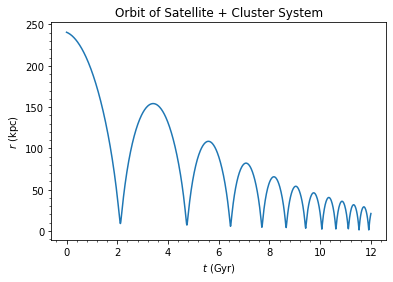

In [14]:
ts = numpy.linspace(0.,12., 1000)*units.Gyr

# Orbit of satellite within Milky Way Galaxy
sat = Orbit(vxvv = [R,vR,vT,z,vz,phi])
sat.integrate(ts, mw + cdf)
sat.plot(d1 = 't', d2 = 'r')
plt.title('Orbit of Satellite + Cluster System')
plt.savefig('Q2_sat.pdf')
plt.show()
plt.close()

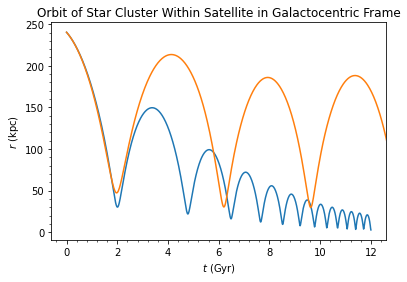

Wall time: 511 ms


In [55]:
%%time
from galpy.potential import MovingObjectPotential


ts = numpy.linspace(0.,12., 1000)*units.Gyr

# Orbit of satellite within Milky Way Galaxy
sat = Orbit(vxvv = [R,vR,vT,z,vz,phi])
sat.integrate(ts, mw + cdf)
sat.plot(d1 = 't', d2 = 'r')
plt.title('Orbit of Satellite + Cluster System in Galactocentric Frame')
plt.savefig('Q2_sat.pdf')
#plt.show()
#plt.close()

ts = numpy.linspace(0.,20., 1000)*units.Gyr

# Orbit of star cluster within satellite
dwarf_pot = MovingObjectPotential(sat, pot = sat_pot)
vR_sc = vx_gal*numpy.cos(phi) + vy_gal*numpy.sin(phi) # radial velocity of star_cluster wrt MW ref frame 
vT_sc = vy_gal*numpy.cos(phi) - vx_gal*numpy.sin(phi) # tangential velocity of star_cluster wrt MW ref frame 
R_sc =  (x_gal**2 + y_gal**2)**(1/2)  # cylindrical radius of the star_cluster wrt galactic center
phi_sc = numpy.arctan(y_gal/x_gal) #####################################################################
star_cluster = Orbit(vxvv = [R_sc ,vR, vT_sc ,z,vz,phi_sc], ro=8., vo =220.) #full 6 coordinates
star_cluster.integrate(ts, mw + dwarf_pot) # star cluster is in combined potential of MW galaxy and the satellite galaxy 
star_cluster.plot(d1 = 't', d2 = 'r', overplot = True) # galactocentric radius as a function of time
plt.title('Orbit of Star Cluster Within Satellite in Galactocentric Frame')
plt.savefig('Q2_sc.pdf')
plt.show()
plt.close()


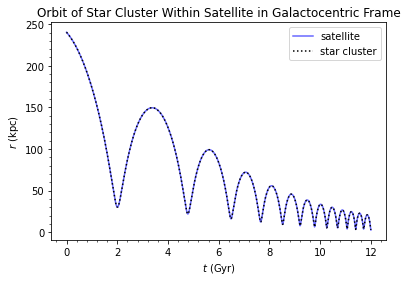

Wall time: 3.39 s


In [53]:
%%time
from galpy.potential import MovingObjectPotential


ts = numpy.linspace(0.,12., 1000)*units.Gyr

# Orbit of satellite within Milky Way Galaxy
sat = Orbit(vxvv = [R,vR,vT,z,vz,phi])
sat.integrate(ts, mw + cdf)
sat.plot(d1 = 't', d2 = 'r', linestyle = '-', color = 'blue', label = 'satellite', alpha=0.6)
plt.title('Orbit of Satellite + Cluster System in Galactocentric Frame')
plt.savefig('Q2_sat.pdf')
#plt.show()
#plt.close()

ts = numpy.linspace(0.,12., 1000)*units.Gyr

R, phi, z = rect_to_cyl(x_gal, y_gal, z_gal)
vR, vT, vz = rect_to_cyl_vec(vx_gal,vy_gal,vz_gal,x_gal,y_gal,z_gal, cyl= False)

# Orbit of star cluster within satellite
dwarf_pot = MovingObjectPotential(sat, pot = sat_pot)
star_cluster = Orbit(vxvv = [R ,vR, vT,z,vz,phi], ro=8., vo =220.) #full 6 coordinates
star_cluster.integrate(ts, mw + dwarf_pot) # star cluster is in combined potential of MW galaxy and the satellite galaxy 
star_cluster.plot(d1 = 't', d2 = 'r', linestyle = ':', overplot = True, color = 'black', label = 'star cluster') # galactocentric radius as a function of time
plt.title('Orbit of Star Cluster Within Satellite in Galactocentric Frame')
plt.savefig('Q2_sc.pdf')
plt.legend()
plt.show()
plt.close()



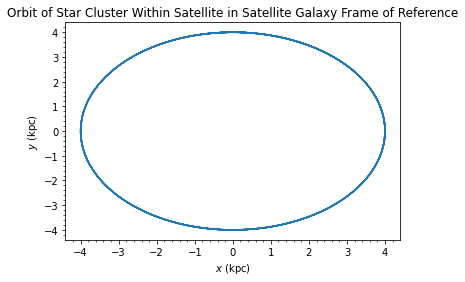

The eccentricity of the orbit is 2.0313202755040824e-08


In [38]:
# Orbit of star cluster in just the potential of the satellite galaxy (without MW potential)
# Check that the orbit is indeed circular as it should be, also check that eccentricity is 0, or nearly 0 

ts = numpy.linspace(0.,3.,1000)*units.Gyr
star_cluster = Orbit(vxvv = [4*units.kpc, 0.*units.km/units.s, vcirc, 0.*units.kpc,0.*units.km/units.s,0.*units.rad], ro=8., vo =220.) #full 6 coordinates
star_cluster.integrate(ts, sat_pot) # star cluster is in potential of satellite galaxy only
star_cluster.plot(d1 = 'x', d2 = 'y') # radius as a function of time (in frame of the satellite galaxy TucanaIII not the galactic frame)
plt.title('Orbit of Star Cluster Within Satellite in Satellite Galaxy Frame of Reference')
plt.show()
plt.close()

print('The eccentricity of the orbit is', star_cluster.e())

f) Bonus: Wrap the MovingObjectPotential with a DehnenSmoothWrapperPotential to make its mass go to zero at 10 Gyr (when the satellite should be at its pericenter); look at the orbit of the cluster again and see how it differs from what happens in e).

https://docs.galpy.org/en/v1.6.0/potential.html#initializing-potentials-with-parameters-with-units

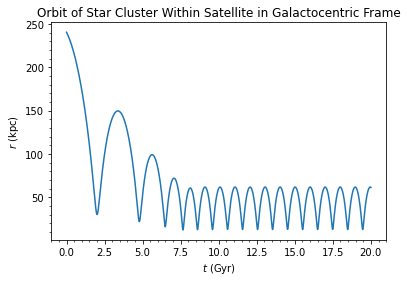

In [58]:
from galpy.potential import DehnenSmoothWrapperPotential

ts = numpy.linspace(0.,20., 1000)*units.Gyr
dswp = DehnenSmoothWrapperPotential(amp=1.0, pot = dwarf_pot, tform=0.*units.Gyr, tsteady=10.*units.Gyr, decay = True)
star_cluster = Orbit(vxvv = [R ,vR, vT,z,vz,phi], ro=8., vo =220.) #full 6 coordinates
star_cluster.integrate(ts, mw + dswp) # star cluster is in combined potential of MW galaxy and the satellite galaxy 
star_cluster.plot(d1 = 't', d2 = 'r') # galactocentric radius as a function of time
plt.title('Orbit of Star Cluster Within Satellite in Galactocentric Frame')
plt.savefig('WrapperPotential-Decaying Mass.pdf')
plt.show()
plt.close()

# Plot radial force as a function of time, check that it goes to 0 at: tsteady after tform 
rad_f = pass

Coordinate & Velocity Conversions: Rectangular (x,y,z, vx, vy, vz) to Cylindrical (R, phi, z, vr, vt, vz) 

In [37]:
from galpy.util.bovy_coords import rect_to_cyl, rect_to_cyl_vec
# From manual calculations of R and phi
print(R_sc, phi_sc, z)
print(numpy.arctan(y_gal/x_gal))

R, phi, z = rect_to_cyl(x_gal, y_gal, z_gal)
print(R,phi,z)

print(vR, vT_sc,vz )
vR, vT, vz = rect_to_cyl_vec(vx_gal,vy_gal,vz_gal,x_gal,y_gal,z_gal, cyl= False)
print(vR, vT, vz)

# Manual calculation
vr = vx_gal*numpy.cos(phi) + vy_gal*numpy.sin(phi)
vt = vy_gal*numpy.cos(phi) - vx_gal*numpy.sin(phi)
print(vr, vt)

# PROBLEMS WITH: phi

149.43466516354977 kpc 1.470598505319358 rad -188.20173666899404 kpc
1.470598505319358 rad
149.43466516354977 kpc -1.6709941482704354 rad -188.20173666899404 kpc
-55.8204802401322 km / s -10.922051668061462 km / s -0.6218911261756745 km / s
-55.8204802401322 km / s -10.922051668061462 km / s -0.6218911261756745 km / s
-55.8204802401322 km / s -10.922051668061462 km / s
